In [3]:
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)


In [3]:
# Load the JSON file into a Pandas DataFrame
file_path = "C:/Users/rogbeast/Desktop/Anti-Money-Laundering-Stream-Training/0a1faab8-cf3a-432c-aa83-e945b6f41310.json"

# Parse the 'transactions' key from the JSON
data = pd.read_json(file_path)
df = pd.json_normalize(data["transactions"])

# Display the first few rows of the DataFrame
print("Data preview:")
df.head().T


Data preview:


,0,1,2
Timestamp,2022/09/02 16:05,2022/09/05 20:14,2022/09/09 09:19
From Bank,121698,210404,210404
Account,80C32DDC0,8072E34D0,8072E34D0
To Bank,149758,121698,121698
Account.1,813478610,80C32DDC0,80C32DDC0
Amount Received,45.14,10749.28,15557.48
Receiving Currency,US Dollar,US Dollar,US Dollar
Amount Paid,45.14,10749.28,15557.48
Payment Currency,US Dollar,US Dollar,US Dollar
Payment Format,Credit Card,Cheque,ACH


In [7]:
# Display the shape of the dataset
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

# Summary statistics of numerical columns
print("Summary statistics:")
print(df.describe())

# Data types of each column
print("Column data types:")
print(df.dtypes)


Number of rows: 3, Number of columns: 11
Summary statistics:
       From Bank   To Bank  Amount Received  Amount Paid  Is Laundering
count       3.00      3.00             3.00         3.00           3.00
mean   180835.33 131051.33          8783.97      8783.97           0.00
std     51214.43  16200.45          7940.72      7940.72           0.00
min    121698.00 121698.00            45.14        45.14           0.00
25%    166051.00 121698.00          5397.21      5397.21           0.00
50%    210404.00 121698.00         10749.28     10749.28           0.00
75%    210404.00 135728.00         13153.38     13153.38           0.00
max    210404.00 149758.00         15557.48     15557.48           0.00
Column data types:
Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Pa

In [8]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64


In [9]:
# Unique values in categorical columns
categorical_cols = ['Receiving Currency', 'Payment Currency', 'Payment Format', 'Is Laundering']
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts())



Unique values in 'Receiving Currency':
Receiving Currency
US Dollar    3
Name: count, dtype: int64

Unique values in 'Payment Currency':
Payment Currency
US Dollar    3
Name: count, dtype: int64

Unique values in 'Payment Format':
Payment Format
Credit Card    1
Cheque         1
ACH            1
Name: count, dtype: int64

Unique values in 'Is Laundering':
Is Laundering
0    3
Name: count, dtype: int64


In [10]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract useful time-based features
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

# Transactions over time
print("Transactions by month:")
print(df.groupby(['Year', 'Month']).size())


Transactions by month:
Year  Month
2022  9        3
dtype: int64


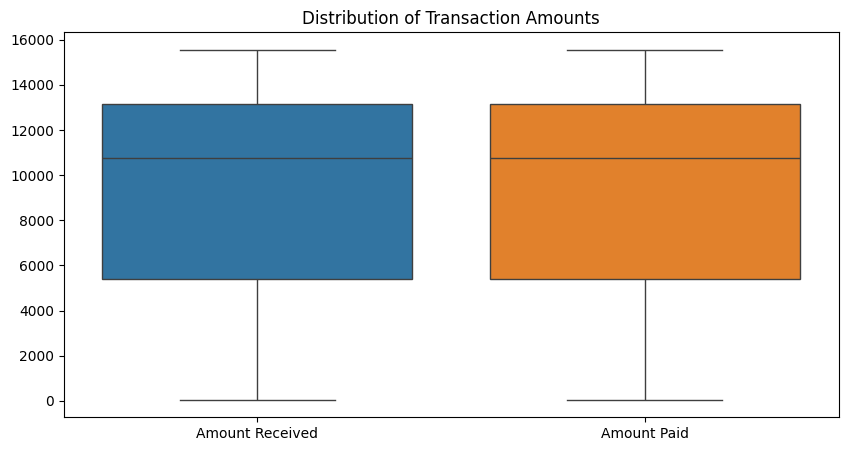

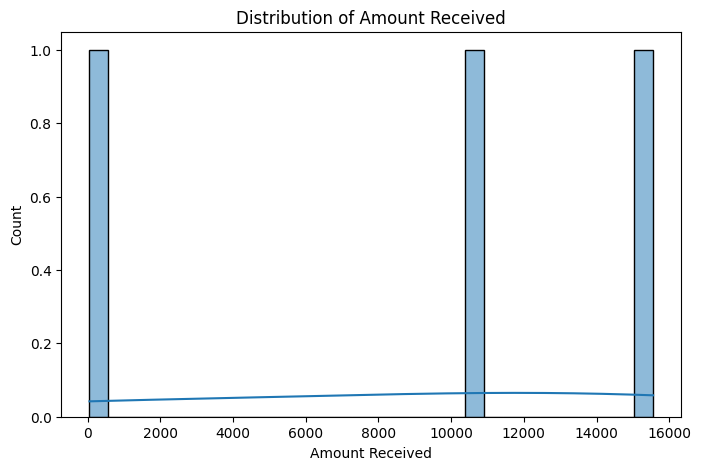

In [11]:
# Boxplot of amounts
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Amount Received', 'Amount Paid']])
plt.title("Distribution of Transaction Amounts")
plt.show()

# Distribution of Amount Received
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount Received'], bins=30, kde=True)
plt.title("Distribution of Amount Received")
plt.show()


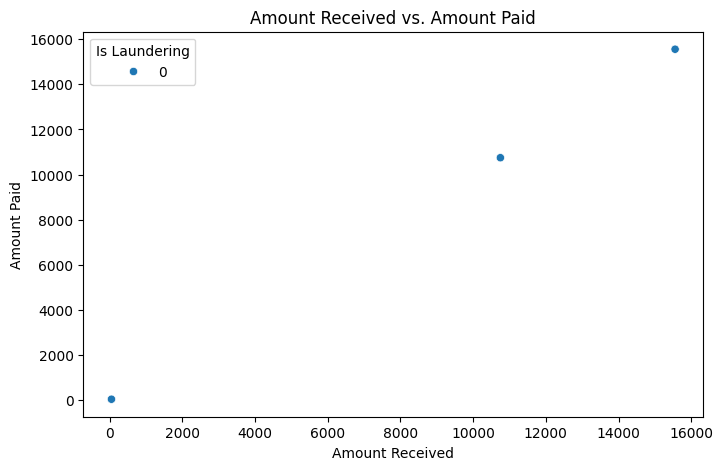

ValueError: could not convert string to float: '80C32DDC0'

<Figure size 800x600 with 0 Axes>

In [12]:
# Scatterplot of Amount Received vs. Amount Paid
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Amount Received', y='Amount Paid', hue='Is Laundering', data=df)
plt.title("Amount Received vs. Amount Paid")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


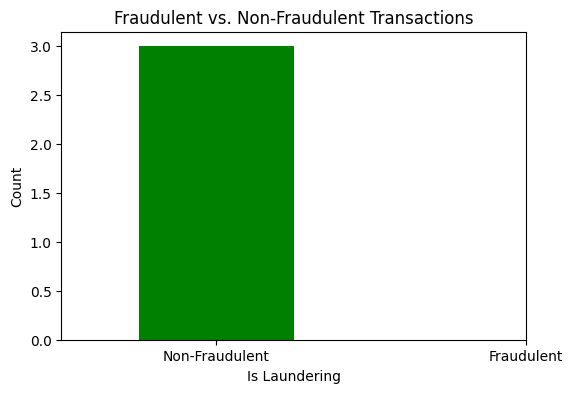

In [13]:
# Count of fraudulent vs. non-fraudulent transactions
fraud_counts = df['Is Laundering'].value_counts()

plt.figure(figsize=(6, 4))
fraud_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Fraudulent vs. Non-Fraudulent Transactions")
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.ylabel("Count")
plt.show()


In [14]:
# Save the processed DataFrame for further use
processed_file_path = "processed_transactions.csv"
df.to_csv(processed_file_path, index=False)
print(f"Processed data saved to: {processed_file_path}")


Processed data saved to: processed_transactions.csv


# Combining JSONs

In [7]:
import os
# Folder containing JSON files
json_folder = "C:/Users/rogbeast/Desktop/Anti-Money-Laundering-Stream-Training/stream-training-project/data/jsons/8"  # Replace with the actual path to your JSON files

# Initialize an empty DataFrame
combined_df = pd.DataFrame()

# Iterate through all JSON files in the folder
for file in os.listdir(json_folder):
    if file.endswith(".json"):
        file_path = os.path.join(json_folder, file)
        
        # Load the JSON file and normalize the 'transactions' key
        data = pd.read_json(file_path)
        if 'transactions' in data.columns:
            df = pd.json_normalize(data["transactions"])
            combined_df = pd.concat([combined_df, df], ignore_index=True)

# Display the combined DataFrame
print("Combined DataFrame:")
combined_df.head()


Combined DataFrame:


,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:11,1601,80CD822B0,1601,80CD822B0,5966.30,US Dollar,5966.30,US Dollar,Reinvestment,0
1,2022/09/01 00:26,1601,80CD822B0,213952,80CDA8170,4957836.00,US Dollar,4957836.00,US Dollar,ACH,0
2,2022/09/01 00:03,221891,80B398060,1244,8022061D0,298.47,US Dollar,298.47,US Dollar,Credit Card,0
3,2022/09/01 00:28,334681,80C9CAB70,334681,80C9CAB70,2251.06,US Dollar,2251.06,US Dollar,Reinvestment,0
4,2022/09/01 00:17,323828,80CEA0970,323828,80CEA0970,695.92,US Dollar,695.92,US Dollar,Reinvestment,0


In [8]:
# Display basic information about the combined DataFrame
print(f"Number of rows: {combined_df.shape[0]}, Number of columns: {combined_df.shape[1]}")
print("Summary statistics:")
print(combined_df.describe())

# Check for missing values
print("Missing values in each column:")
print(combined_df.isnull().sum())


Number of rows: 11217, Number of columns: 11
Summary statistics:
       From Bank   To Bank  Amount Received   Amount Paid  Is Laundering
count   11217.00  11217.00         11217.00      11217.00       11217.00
mean    81224.25  84546.43       2147666.62    1799947.59           0.00
std     98142.63  94978.41      78492518.86   75235872.64           0.00
min         1.00      1.00             0.01          0.01           0.00
25%     11296.00  12893.00            17.60         17.60           0.00
50%     24132.00  26592.00           996.00        999.09           0.00
75%    129470.00 130449.00         16600.68      16635.84           0.00
max    335857.00 335857.00    5351188958.74 5351188958.74           0.00
Missing values in each column:
Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laun


Unique values in 'Receiving Currency':
Receiving Currency
US Dollar            10905
UK Pound               255
Mexican Peso            12
Swiss Franc             12
Yuan                     9
Euro                     8
Brazil Real              6
Australian Dollar        3
Canadian Dollar          2
Yen                      2
Rupee                    2
Bitcoin                  1
Name: count, dtype: int64

Unique values in 'Payment Currency':
Payment Currency
US Dollar            10904
UK Pound               255
Yuan                    20
Euro                    15
Mexican Peso             6
Australian Dollar        5
Swiss Franc              4
Brazil Real              2
Canadian Dollar          2
Yen                      2
Bitcoin                  1
Rupee                    1
Name: count, dtype: int64

Unique values in 'Payment Format':
Payment Format
Reinvestment    8400
Credit Card      988
Cheque           928
ACH              491
Cash             295
Wire             114
Bitcoin  

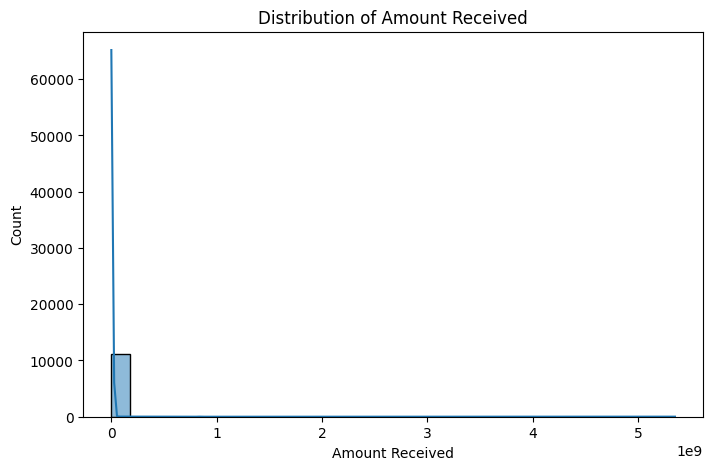

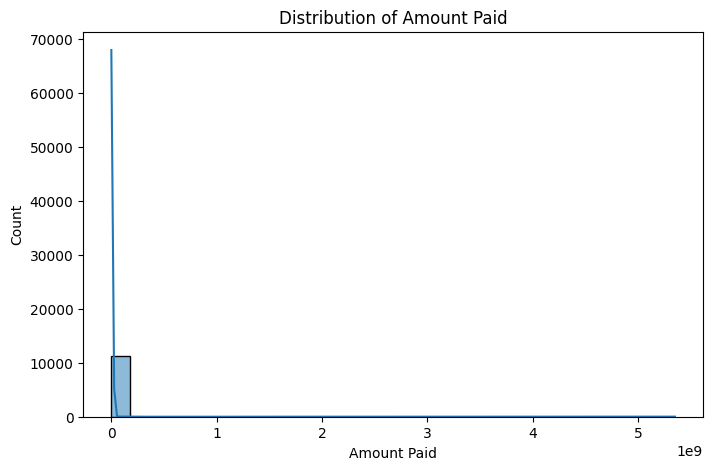

In [9]:
# Convert Timestamp to datetime format
if 'Timestamp' in combined_df.columns:
    combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])

# Analyze categorical columns
categorical_cols = ['Receiving Currency', 'Payment Currency', 'Payment Format', 'Is Laundering']
for col in categorical_cols:
    if col in combined_df.columns:
        print(f"\nUnique values in '{col}':")
        print(combined_df[col].value_counts())

# Visualize numeric columns
numeric_cols = ['Amount Received', 'Amount Paid']
for col in numeric_cols:
    if col in combined_df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(combined_df[col], bins=30, kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()


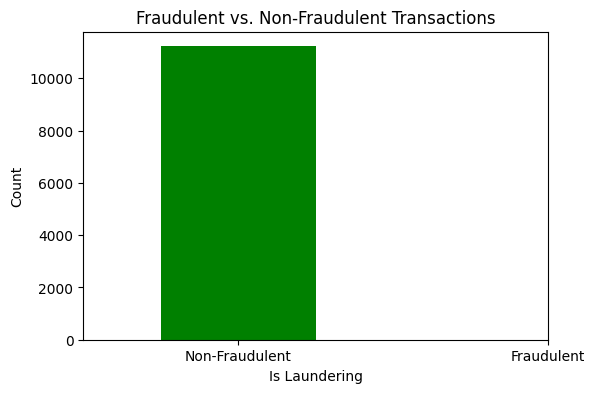

In [10]:
# Analyze fraudulent vs. non-fraudulent transactions
if 'Is Laundering' in combined_df.columns:
    fraud_counts = combined_df['Is Laundering'].value_counts()

    plt.figure(figsize=(6, 4))
    fraud_counts.plot(kind='bar', color=['green', 'red'])
    plt.title("Fraudulent vs. Non-Fraudulent Transactions")
    plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'], rotation=0)
    plt.ylabel("Count")
    plt.show()


In [12]:
unique_values = {feature: set(df[categorical_cols]) for feature in combined_df}

In [17]:
type(unique_values)

dict

In [24]:
unique_values.values()

dict_values([{'Payment Format', 'Receiving Currency', 'Is Laundering', 'Payment Currency'}, {'Payment Format', 'Receiving Currency', 'Is Laundering', 'Payment Currency'}, {'Payment Format', 'Receiving Currency', 'Is Laundering', 'Payment Currency'}, {'Payment Format', 'Receiving Currency', 'Is Laundering', 'Payment Currency'}, {'Payment Format', 'Receiving Currency', 'Is Laundering', 'Payment Currency'}, {'Payment Format', 'Receiving Currency', 'Is Laundering', 'Payment Currency'}, {'Payment Format', 'Receiving Currency', 'Is Laundering', 'Payment Currency'}, {'Payment Format', 'Receiving Currency', 'Is Laundering', 'Payment Currency'}, {'Payment Format', 'Receiving Currency', 'Is Laundering', 'Payment Currency'}, {'Payment Format', 'Receiving Currency', 'Is Laundering', 'Payment Currency'}, {'Payment Format', 'Receiving Currency', 'Is Laundering', 'Payment Currency'}])

In [23]:
unique_values['Receiving Currency']

{'Is Laundering', 'Payment Currency', 'Payment Format', 'Receiving Currency'}

In [25]:
import pandas as pd

# List of features to analyze
features = ['Receiving Currency', 'Payment Currency', 'Payment Format']

# Find and print unique values for each feature
for feature in features:
    unique_vals = combined_df[feature].unique()  # Get unique values
    print(f"Unique values for '{feature}': {list(unique_vals)}")


Unique values for 'Receiving Currency': ['US Dollar', 'Brazil Real', 'Mexican Peso', 'Yuan', 'Australian Dollar', 'UK Pound', 'Canadian Dollar', 'Yen', 'Swiss Franc', 'Euro', 'Bitcoin', 'Rupee']
Unique values for 'Payment Currency': ['US Dollar', 'Brazil Real', 'Mexican Peso', 'Yuan', 'Australian Dollar', 'UK Pound', 'Euro', 'Canadian Dollar', 'Yen', 'Swiss Franc', 'Bitcoin', 'Rupee']
Unique values for 'Payment Format': ['Reinvestment', 'ACH', 'Credit Card', 'Cheque', 'Wire', 'Cash', 'Bitcoin']
